In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# url = "https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8"
# df = pd.read_html(url)[0]

match = 'Коефіцієнт народжуваності в регіонах України'
df = pd.read_html('https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8',
                     thousands="",
                     decimal=",",
                     match=match
                    )[0]

Виведення перших рядків таблиці

In [150]:
print("Перші рядки таблиці:")
print(df.head())

Перші рядки таблиці:
             Регіон  1950  1960  1970  1990  2000  2012  2014  2019
0              Крим  23.0  20.6  16.0  13.0   7.3  12.6     —     —
1         Вінницька  22.4  19.2  14.2  12.4   8.4  11.2  10.9   7.6
2         Волинська  24.7  25.0  17.9  15.3  11.2  14.8  14.1  10.1
3  Дніпропетровська  20.4  20.4  15.1  12.3   7.1  11.2  11.1   7.1
4          Донецька  27.1  21.4  14.0  10.9   6.1   9.8   8.2     —


Визначення кількості рядків та стовпців

In [151]:
rows, columns = df.shape
print(f"\nКількість рядків: {rows}, Кількість стовпців: {columns}")


Кількість рядків: 28, Кількість стовпців: 9


Заміна значень "—" на NaN

In [152]:
df.replace("—", np.nan, inplace=True)

Визначення типів стовпців

In [153]:
print("\nТипи стовпців:")
print(df.dtypes)


Типи стовпців:
Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014       object
2019       object
dtype: object


Заміна типів нечислових колонок на числові

In [154]:
non_numeric_columns = df.columns[df.dtypes == object]

df.loc[:, non_numeric_columns.drop('Регіон')] = df[non_numeric_columns.drop('Регіон')].apply(pd.to_numeric, errors='coerce')

Частка пропусків в кожній колонці

In [155]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
print("\nЧастка пропусків в кожній колонці:")
print(missing_percentage)


Частка пропусків в кожній колонці:
Регіон     0.000000
1950       7.142857
1960       3.571429
1970       3.571429
1990       0.000000
2000       0.000000
2012       0.000000
2014       7.142857
2019      14.285714
dtype: float64


Видалення останнього рядка

In [156]:
df.drop(df.tail(1).index, inplace=True)

Заміна відсутніх даних середніми значеннями

In [157]:
numeric_columns = df.select_dtypes(include=[np.number]).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())


Список регіонів з народжуваністю вище середньої у 2019 році

Регіони з народжуваністю вище середньої у 2019 році:
['Волинська', 'Закарпатська', 'Івано-Франківська', 'Львівська', 'Одеська', 'Рівненська', 'Херсонська', 'Чернівецька', 'Київ']


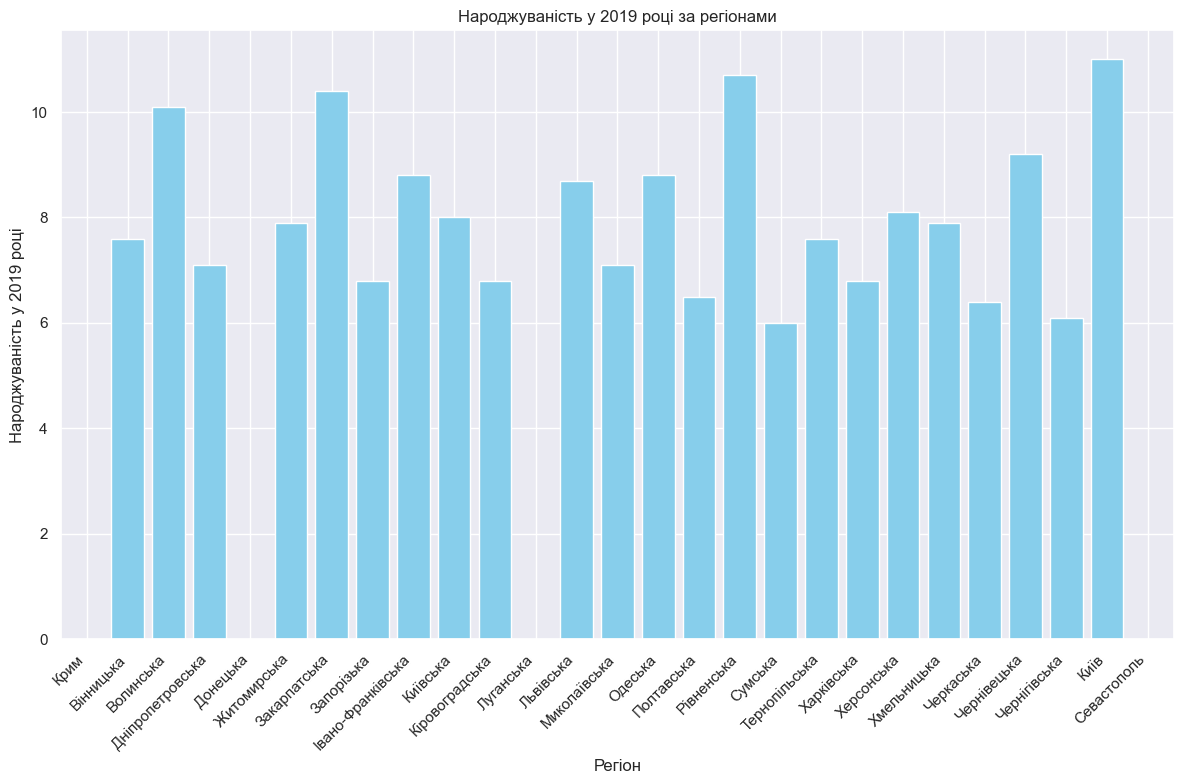

In [158]:
table = df.replace("—", float("nan"))
table["2019"] = pd.to_numeric(table["2019"], errors="coerce")
average_birth_rate_2019 = table["2019"].mean()
regions_above_average_2019 = table[table["2019"] > average_birth_rate_2019]["Регіон"]

print("Регіони з народжуваністю вище середньої у 2019 році:")
print(regions_above_average_2019.tolist())

plt.figure(figsize=(12, 8))
plt.bar(table["Регіон"], table["2019"], color='skyblue')
plt.xlabel('Регіон')
plt.ylabel('Народжуваність у 2019 році')
plt.title('Народжуваність у 2019 році за регіонами')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()



У якому регіоні була найвища народжуваність у 2014 році?


Регіон з найвищою народжуваністю у 2014 році: Рівненська


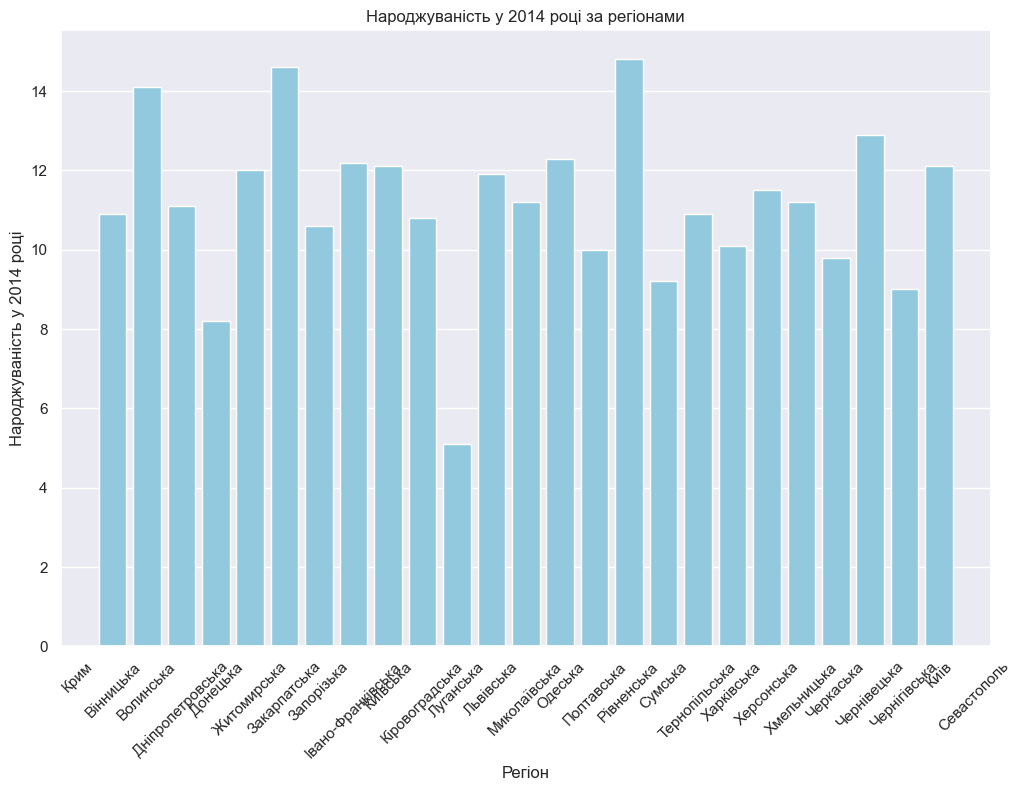

In [159]:
import seaborn as sns

table = table.replace("—", float("nan"))
numeric_columns = table.columns[1:]
table[numeric_columns] = table[numeric_columns].apply(pd.to_numeric, errors="coerce")
region_highest_birth_rate_2014 = table.loc[table["2014"].idxmax()]["Регіон"]
print("\nРегіон з найвищою народжуваністю у 2014 році:", region_highest_birth_rate_2014)

sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(12,8)})

%matplotlib inline
plt.figure(figsize=(12, 8))
sns.barplot(x='Регіон', y='2014', data=table, color='skyblue')
plt.xlabel('Регіон')
plt.ylabel('Народжуваність у 2014 році')
plt.title('Народжуваність у 2014 році за регіонами')
plt.xticks(rotation=45)
plt.show()

Побудуйте стовпчикову діаграму народжуваності по регіонах у 2019 році

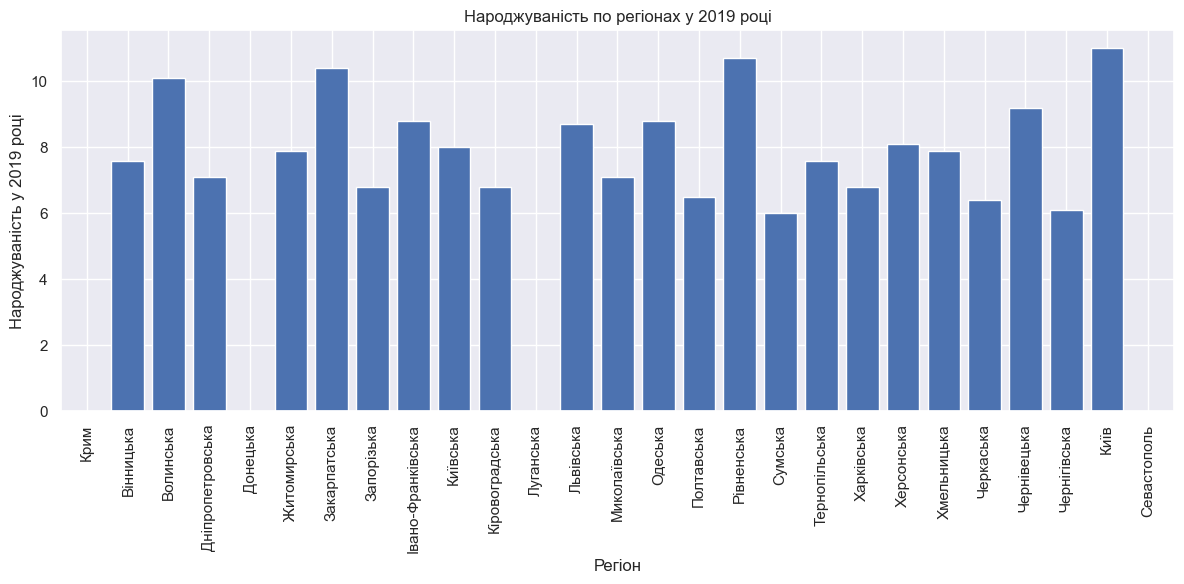

In [160]:
import matplotlib.pyplot as plt

table = table.replace("—", float("nan"))
numeric_columns = table.columns[1:]
table[numeric_columns] = table[numeric_columns].apply(pd.to_numeric, errors="coerce")
plt.figure(figsize=(12, 6))
plt.bar(table["Регіон"], table["2019"])
plt.title("Народжуваність по регіонах у 2019 році")
plt.xlabel("Регіон")
plt.ylabel("Народжуваність у 2019 році")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()